In [1]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import math
from Spline import spline_coefs,spline_interp


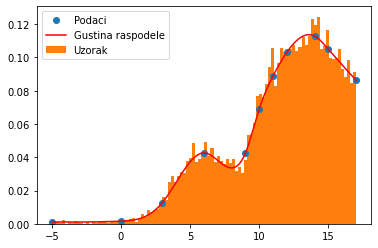

In [2]:

x = np.array([-5,0,3,6,9,10,11,12,14,15,17])
y = np.array([0.0011,0.0016,0.0128,0.0426,0.0426,0.0691,0.089,0.1032,0.1128,0.1048,0.0862])


velicina_uzorka = 10000
xx = np.linspace(np.min(x),np.max(x),1000)
yy = spline_interp(x,y,xx)

a,b,c,d = spline_coefs(x,y)
l = len(xx)
n = len(x)-1

Y0 = np.zeros(n)
YY = np.zeros(l)

for i in range(l):
    ind = np.argwhere(x<=xx[i])[-1]
    if (ind == n):
        ind = ind - 1
    if(ind == 0):
        Y0[ind] = 0
    else:
        Y0[ind] = np.polyval([d[ind-1]/4,c[ind-1]/3,b[ind-1]/2,a[ind-1],Y0[ind-1]],x[ind]-x[ind-1])

    YY[i] = np.polyval([d[ind]/4,c[ind]/3,b[ind]/2,a[ind],Y0[ind]],(xx[i]-x[ind]))

plt.figure()
plt.plot(x, y,'o', label='Podaci')
plt.plot(xx, yy, 'r',label='Gustina raspodele')


## Generisanje uzorka

rr = np.random.rand(velicina_uzorka)*np.max(YY)
uzorak = np.zeros_like(rr)

for i in range(len(rr)):
    ind = np.argwhere(Y0<= rr[i])[-1]
    if(ind == len(Y0)):
        ind = ind - 1

    t = np.roots(np.array([d[ind]/4,c[ind]/3,b[ind]/2,a[ind],Y0[ind]-rr[i]]).flatten())
    t = t[np.argwhere(np.imag(t)==0).flatten()]
    t = t[np.argwhere(t>0).flatten()]
    t = t[np.argwhere(t<x[ind+1]-x[ind]).flatten()]
    t = t + x[ind]
    uzorak[i] = np.real(t)

plt.hist(uzorak,100,density=True,label='Uzorak')
plt.legend()

plt.show()

